<a href="https://colab.research.google.com/github/qedir314/Neural-Networks-Zero-to-Hero/blob/main/makemore_2_mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
words = open('/content/names.txt', 'r').read().splitlines()
words[:5]

['emma', 'olivia', 'ava', 'isabella', 'sophia']

In [29]:
len(words)

32033

In [30]:
chars = sorted(list(set(''.join(words))))
stoi = {s: i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s, i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [31]:
block_size = 3
X, Y = [], []
for word in words[:5]:

  print(word)
  context = [0] * block_size
  for ch in word + '.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    print(''.join(itos[i] for i in context), '---->', itos[ix])
    context = context[1:] + [ix]

X = torch.tensor(X)
Y = torch.tensor(Y)

emma
... ----> e
..e ----> m
.em ----> m
emm ----> a
mma ----> .
olivia
... ----> o
..o ----> l
.ol ----> i
oli ----> v
liv ----> i
ivi ----> a
via ----> .
ava
... ----> a
..a ----> v
.av ----> a
ava ----> .
isabella
... ----> i
..i ----> s
.is ----> a
isa ----> b
sab ----> e
abe ----> l
bel ----> l
ell ----> a
lla ----> .
sophia
... ----> s
..s ----> o
.so ----> p
sop ----> h
oph ----> i
phi ----> a
hia ----> .


In [32]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([32, 3]), torch.int64, torch.Size([32]), torch.int64)

In [33]:
C = torch.randn((27, 2))

In [34]:
C[5]

tensor([ 2.1893, -1.3360])

In [35]:
emb = C[X]
emb.shape

torch.Size([32, 3, 2])

In [36]:
W1 = torch.randn((6, 100))
b1 = torch.randn(100)

In [37]:
# emb @ W1 + b1
# Won't work

In [38]:
torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]], 1).shape

torch.Size([32, 6])

In [39]:
torch.cat(torch.unbind(emb, 1), 1).shape

torch.Size([32, 6])

In [40]:
emb.view(32, 6) == torch.cat(torch.unbind(emb, 1), 1)

tensor([[True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, T

In [41]:
# h = emb.view(-1, 6) @ W1 + b1
h = emb.view(emb.shape[0], 6) @ W1 + b1
h.shape

torch.Size([32, 100])

In [42]:
h = torch.tanh(h)
h.shape, h

(torch.Size([32, 100]),
 tensor([[ 0.2475, -0.2555,  0.7739,  ...,  0.6847,  0.0516, -0.7781],
         [-1.0000, -0.3517,  0.3354,  ...,  0.9853, -0.2786, -0.1827],
         [-0.9994,  0.9521,  0.8897,  ...,  1.0000,  0.9945,  0.9774],
         ...,
         [ 0.2938,  0.9601, -0.3284,  ...,  0.9837, -0.6362, -0.9978],
         [-0.8960,  0.9215,  0.6674,  ..., -0.9889, -0.7461, -0.9693],
         [ 0.8642,  0.9933,  0.7577,  ...,  0.9630, -0.4088, -0.9938]]))

In [43]:
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [44]:
logits = h @ W2 + b2

In [45]:
logits.shape

torch.Size([32, 27])

In [46]:
counts = logits.exp()
probs = counts / counts.sum(1, keepdims=True)

In [47]:
probs.shape

torch.Size([32, 27])

In [48]:
loss = -probs[torch.arange(32), Y].log().mean()
loss

tensor(20.7933)

## Respectable version

In [49]:
X.shape, Y.shape

(torch.Size([32, 3]), torch.Size([32]))

In [50]:
g = torch.Generator().manual_seed(214412)
C = torch.randn((27,2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [51]:
sum(p.nelement() for p in parameters)

3481

In [57]:
for p in parameters:
  p.requires_grad = True

In [61]:
for _ in range(100):
  # forward pass
  emb = C[X]
  h = torch.tanh(emb.view(-1, 6) @ W1 + b1)  # shape (32, 100)
  logits = h @ W2 + b2 # shape (32, 27)
  # counts = logits.exp()
  # probs = counts / counts.sum(1, keepdims=True)
  # loss = -probs[torch.arange(32), Y].log().mean()
  # loss
  loss = F.cross_entropy(logits, Y)
  if _ % 10 == 0:
    print(loss.item())

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  for p in parameters:
    p.data += -0.1 * p.grad

0.34751102328300476
0.344429612159729
0.34098830819129944
0.33713817596435547
0.33288902044296265
0.32833412289619446
0.3236420154571533
0.3190099895000458
0.31460270285606384
0.3105136752128601


In [63]:
logits.max(1)

torch.return_types.max(
values=tensor([ 7.8922, 13.0984, 12.9815, 15.8731, 16.2024,  7.8922, 10.7355, 12.6147,
        11.1286, 15.9511,  9.6406, 15.6267,  7.8922, 15.7948, 17.0829, 16.1469,
         7.8922,  9.4709, 16.9443, 14.2421, 17.2381, 13.0989, 15.1578, 15.7263,
        16.2310,  7.8922, 16.2465, 13.7000, 13.7903, 13.2823, 14.4496, 14.6550],
       grad_fn=<MaxBackward0>),
indices=tensor([19, 13, 13,  1,  0, 19, 12,  9, 22,  9,  1,  0, 19, 22,  1,  0, 19, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0]))

In [65]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

## Training on the full dataset

In [157]:
block_size = 3
X, Y = [], []
for word in words:

  context = [0] * block_size
  for ch in word + '.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)

    context = context[1:] + [ix]

X = torch.tensor(X)
Y = torch.tensor(Y)

In [158]:
X.shape, Y.shape

(torch.Size([228146, 3]), torch.Size([228146]))

In [159]:
C = torch.randn((27, 2))
emb = C[X]
emb.shape

torch.Size([228146, 3, 2])

In [168]:
g = torch.Generator().manual_seed(214412)
C = torch.randn((27,2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

for p in parameters:
  p.requires_grad = True

In [165]:
# lre = torch.linspace(-3, 0, 1000)
# lrs = 10 ** lre

In [171]:
# lri = []
# lossi = []

for i in range(100000):

  # minibatch

  ix = torch.randint(0, X.shape[0], (32,))

  # forward pass
  emb = C[X[ix]]
  h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
  logits = h @ W2 + b2

  loss = F.cross_entropy(logits, Y[ix])
  if i % 10000 == 0:
    print(loss.item())

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update

  #lr = lrs[i]
  lr = 0.1    # after experimenting, it's better for initial
  for p in parameters:
    # p.data += -0.01 * p.grad
    # p.data += -lr * p.grad
    p.data += -lr * p.grad

  # tracking

  # lri.append(lre[i])
  # lossi.append(loss.item())

3.0151331424713135
2.6350998878479004
2.2080509662628174
2.743877410888672
2.5585765838623047
2.4366328716278076
2.2705650329589844
2.546445608139038
2.6219425201416016
2.6143686771392822


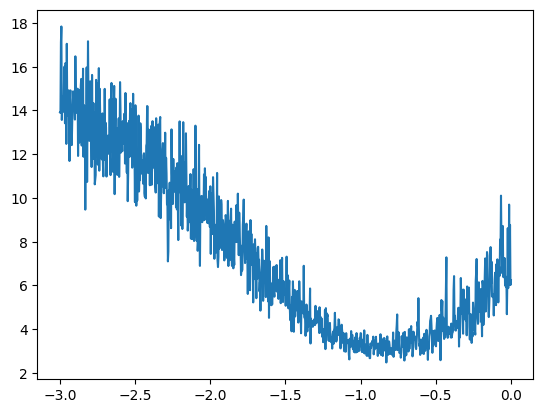

In [167]:
# plt.plot(lri, lossi);

In [172]:
# loss on total training set
emb = C[X]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Y)
loss

tensor(2.3214, grad_fn=<NllLossBackward0>)

In [93]:
emb.shape

torch.Size([228146, 3, 2])

In [100]:
torch.randint(0, X.shape[0], (32, ))

tensor([ 25971,  21242, 122050, 215270, 210414, 134066, 119077,  36927,  83498,
         18068, 137161,  87807, 210480, 126262,  38201, 166090, 196545, 180358,
          9335, 219481,  89305, 197952,  77394, 151326,  47135, 205267,  73016,
         41793, 121416, 180096, 161644, 106184])

# Training on train, val, test splits

In [173]:
def build_dataset(words):
  block_size = 3
  X, Y = [], []
  for word in words:

    context = [0] * block_size
    for ch in word + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)

      context = context[1:] + [ix]

  X = torch.tensor(X)
  Y = torch.tensor(Y)

  print(X.shape, Y.shape)
  return X, Y

In [174]:
import random

random.seed(42)
random.shuffle(words)

n1 = int(0.8*(len(words)))
n2 = int(0.9*(len(words)))

Xtr, Ytr = build_dataset(words[:n1])
Xval, Yval = build_dataset(words[n1:n2])
Xtest, Ytest = build_dataset(words[n2:])

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [179]:
C = torch.randn((27, 2))
emb = C[X]
emb.shape

torch.Size([228146, 3, 2])

In [236]:
g = torch.Generator().manual_seed(214412)
C = torch.randn((27,2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

for p in parameters:
  p.requires_grad = True

In [237]:
for i in range(10000):

  # minibatch

  ix = torch.randint(0, Xtr.shape[0], (32,))  # training set

  # forward pass
  emb = C[Xtr[ix]]
  h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
  logits = h @ W2 + b2

  loss = F.cross_entropy(logits, Ytr[ix])   # here also
  if i % 1000 == 0:
    print(loss.item())

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update

  lr = 0.1
  for p in parameters:
    p.data += -lr * p.grad

13.529951095581055
2.796112298965454
2.7516229152679443
2.562988519668579
2.8550331592559814
2.1246163845062256
2.5169434547424316
2.3692548274993896
2.5465638637542725
2.5049972534179688


In [238]:
# loss on validation set
emb = C[Xval]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Yval)
loss

tensor(2.5417, grad_fn=<NllLossBackward0>)

In [239]:
# loss on test set
emb = C[Xtest]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ytest)
loss

tensor(2.5446, grad_fn=<NllLossBackward0>)

## Training on larger hidden layer

In [224]:
import random

random.seed(42)
random.shuffle(words)

n1 = int(0.8*(len(words)))
n2 = int(0.9*(len(words)))

Xtr, Ytr = build_dataset(words[:n1])
Xval, Yval = build_dataset(words[n1:n2])
Xtest, Ytest = build_dataset(words[n2:])

torch.Size([182580, 3]) torch.Size([182580])
torch.Size([22767, 3]) torch.Size([22767])
torch.Size([22799, 3]) torch.Size([22799])


In [225]:
C = torch.randn((27, 2))
emb = C[X]
emb.shape

torch.Size([228146, 3, 2])

In [240]:
g = torch.Generator().manual_seed(214412)
C = torch.randn((27,2), generator=g)
W1 = torch.randn((6, 300), generator=g)
b1 = torch.randn(300, generator=g)
W2 = torch.randn((300, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

for p in parameters:
  p.requires_grad = True

sum(p.nelement() for p in parameters)

10281

In [248]:
stepi = []
lossi = []

for i in range(50000):

  # minibatch

  ix = torch.randint(0, Xtr.shape[0], (32,))  # training set

  # forward pass
  emb = C[Xtr[ix]]
  h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
  logits = h @ W2 + b2

  loss = F.cross_entropy(logits, Ytr[ix])   # here also
  if i % 10000 == 0:
    print(loss.item())

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update

  lr = 0.025
  for p in parameters:
    p.data += -lr * p.grad

  # tracking
  stepi.append(i)
  lossi.append(loss.item())

2.577834367752075
2.34765625
2.3018343448638916
2.313345432281494
2.259721040725708


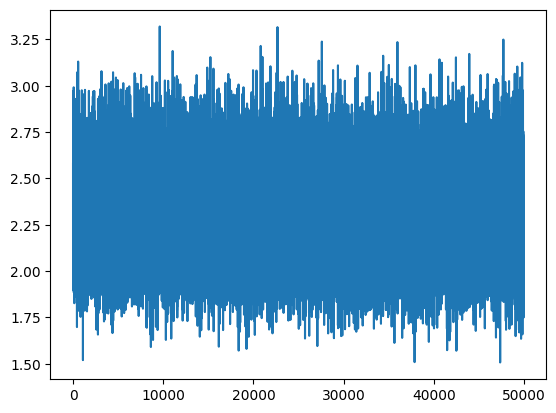

In [249]:
plt.plot(stepi, lossi);

In [250]:
# loss on validation set
emb = C[Xval]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Yval)
loss

tensor(2.3153, grad_fn=<NllLossBackward0>)

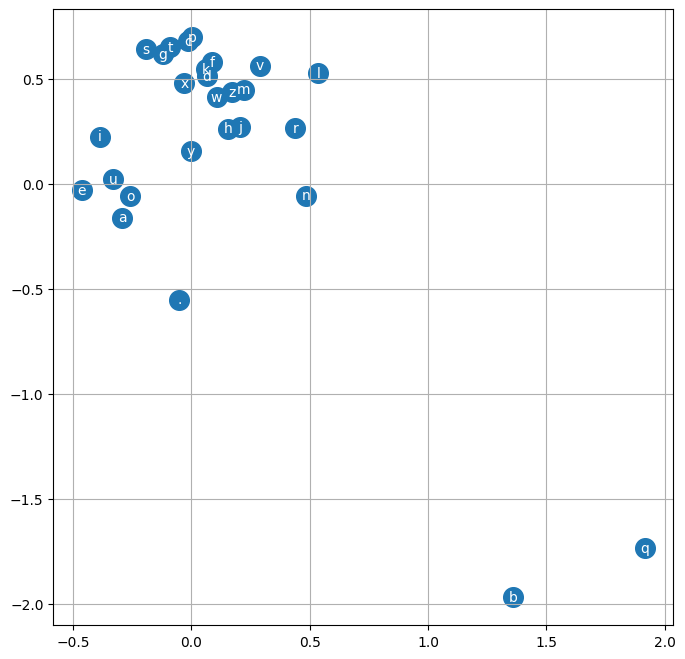

In [251]:
plt.figure(figsize=(8,8))
plt.scatter(C[:, 0].data, C[:, 1].data, s=200)
for i in range(C.shape[0]):
  plt.text(C[i,0].item(), C[i, 1].item(), itos[i], ha='center', va='center', color='white')
plt.grid('minor')

## Training on larger embedding size

In [260]:
g = torch.Generator().manual_seed(214412)
C = torch.randn((27, 10), generator=g)    # change here
W1 = torch.randn((30, 200), generator=g)  # change here
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

for p in parameters:
  p.requires_grad = True

sum(p.nelement() for p in parameters)

11897

In [261]:
stepi = []
lossi = []

In [294]:
for i in range(50000):

  # minibatch

  ix = torch.randint(0, Xtr.shape[0], (32,))  # training set

  # forward pass
  emb = C[Xtr[ix]]
  h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
  logits = h @ W2 + b2

  loss = F.cross_entropy(logits, Ytr[ix])   # here also
  if i % 10000 == 0:
    print(loss.item())

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update

  lr = 0.0003
  for p in parameters:
    p.data += -lr * p.grad

  # tracking
  stepi.append(i)
  lossi.append(loss.log10().item())

2.2686238288879395
1.975475549697876
2.4395992755889893
2.1934807300567627
2.4364140033721924


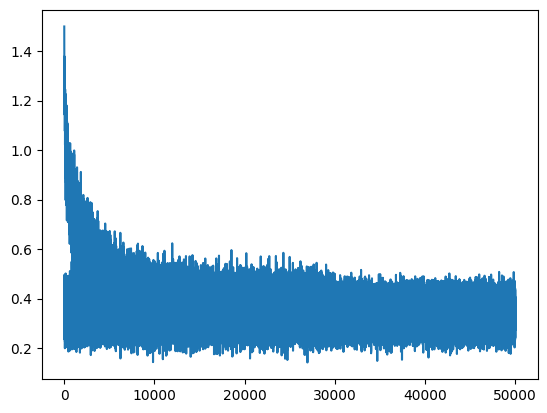

In [288]:
plt.plot(stepi, lossi)

In [295]:
# loss on validation set
emb = C[Xval]
h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Yval)
loss

tensor(2.2209, grad_fn=<NllLossBackward0>)

In [299]:
# loss on train set
emb = C[Xtr]
h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.1991, grad_fn=<NllLossBackward0>)

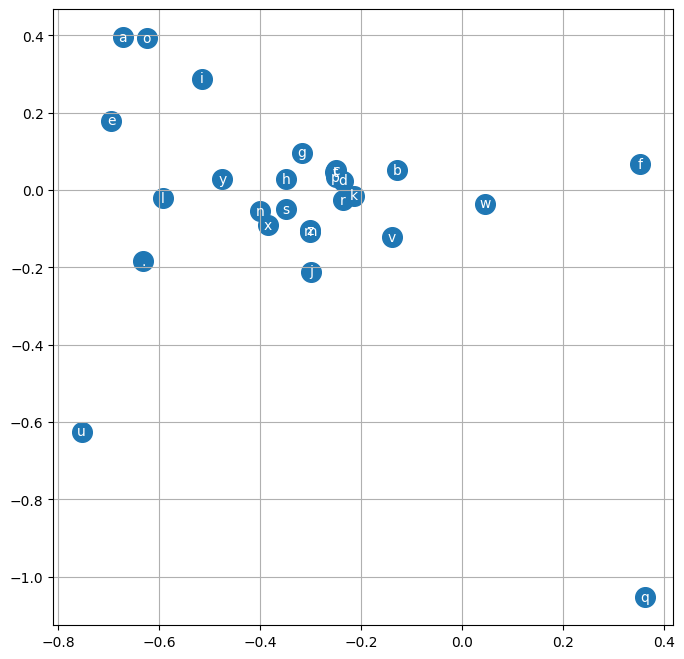

In [300]:
plt.figure(figsize=(8,8))
plt.scatter(C[:, 0].data, C[:, 1].data, s=200)
for i in range(C.shape[0]):
  plt.text(C[i,0].item(), C[i, 1].item(), itos[i], ha='center', va='center', color='white')
plt.grid('minor')

In [297]:
# sample from model
g = torch.Generator().manual_seed(214414)

for _ in range(20):

  out = []
  context = [0] * block_size
  while True:
    emb = C[torch.tensor([context])]
    h = torch.tanh(emb.view(1, -1) @ W1 + b1)
    logits = h @ W2 + b2
    probs = F.softmax(logits, dim=1)
    ix = torch.multinomial(probs, num_samples=1, generator=g).item()
    context = context[1:] + [ix]
    out.append(ix)
    if ix == 0:
      break
  print(''.join(itos[i] for i in out))

juliyla.
matelvsin.
annete.
ryani.
kam.
lani.
yyansi.
eho.
ihahie.
kyrah.
ivener.
dauvriery.
nika.
irse.
ban.
kaisaraut.
asarevton.
cevylda.
lavilya.
breraysan.


## More complex model

In [334]:
g = torch.Generator().manual_seed(214412)
C = torch.randn((27, 20), generator=g)    # change here
W1 = torch.randn((60, 300), generator=g)  # change here
b1 = torch.randn(300, generator=g)
W2 = torch.randn((300, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

for p in parameters:
  p.requires_grad = True

sum(p.nelement() for p in parameters)

26967

In [354]:
for i in range(50000):

  # minibatch

  ix = torch.randint(0, Xtr.shape[0], (32,))  # training set

  # forward pass
  emb = C[Xtr[ix]]
  h = torch.tanh(emb.view(-1, 60) @ W1 + b1)
  logits = h @ W2 + b2

  loss = F.cross_entropy(logits, Ytr[ix])   # here also
  if i % 10000 == 0:
    print(loss.item())

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update

  lr = 0.005
  for p in parameters:
    p.data += -lr * p.grad

1.9748740196228027
1.916609287261963
2.372389554977417
1.6285957098007202
1.948996663093567


In [355]:
# loss on train set
emb = C[Xtr]
h = torch.tanh(emb.view(-1, 60) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.0321, grad_fn=<NllLossBackward0>)

In [357]:
# loss on validation set
emb = C[Xval]
h = torch.tanh(emb.view(-1, 60) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Yval)
loss

tensor(2.1404, grad_fn=<NllLossBackward0>)

In [358]:
# sample from model
g = torch.Generator().manual_seed(214414)

for _ in range(20):

  out = []
  context = [0] * block_size
  while True:
    emb = C[torch.tensor([context])]
    h = torch.tanh(emb.view(1, -1) @ W1 + b1)
    logits = h @ W2 + b2
    probs = F.softmax(logits, dim=1)
    ix = torch.multinomial(probs, num_samples=1, generator=g).item()
    context = context[1:] + [ix]
    out.append(ix)
    if ix == 0:
      break
  print(''.join(itos[i] for i in out))

julie.
sam.
talazii.
anna.
gory.
dreyah.
lani.
yakaylie.
ju.
grace.
kyra.
ziven.
raynuckier.
bay.
alias.
abdamian.
arnavi.
sarevion.
cestrygrayviana.
rodiay.
